# Implementation of Detrend algorithm 

Use and implementation of the detrend algorithm

## load data and libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def parser(x):
    return pd.datetime.strptime('190' + x, '%Y-%m')

/var/folders/hc/xqxzgk5n4hs3y32vlv1pghwm0000gn/T/ipykernel_1129/1061290716.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
/var/folders/hc/xqxzgk5n4hs3y32vlv1pghwm0000gn/T/ipykernel_1129/1899286547.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190' + x, '%Y-%m')


<AxesSubplot:xlabel='Month'>

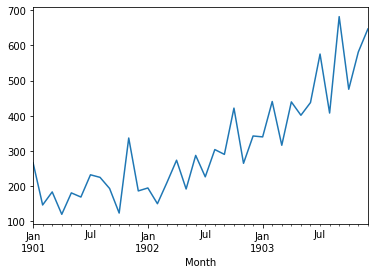

In [23]:
series = pd.read_csv('dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()

### Detredn by differencing

Perhaps the simplest method to detrend a time series is by differencing.

Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

```
value(t) = observation(t) - observation(t-1)
```

This has the effect of removing a trend from a time series dataset.

We can create a new difference dataset in Python by implementing this directly. A new list of observations can be created.

Below is an example that creates the difference detrended version of the Shampoo Sales dataset.

Running the example creates the new detrended dataset and then plots the time series.

Because no difference value can be created for the first observation (there is nothing for it to be subtracted from), the new dataset contains one less record. We can see that indeed the trend does appear to have been removed.

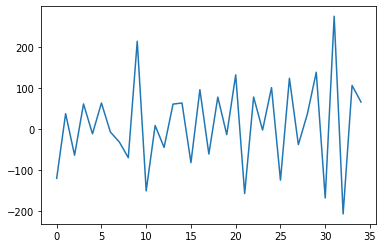

In [24]:

X = series.values
diff = list()

for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)

plt.plot(diff)


## Detrend by Model Fitting

A trend is often easily visualized as a line through the observations.

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.

Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series.

For example, a linear model can be fit on the time index to predict the observation. This dataset would look as follows:

The predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a detrended version of the dataset.

```
value(t) = observation(t) - prediction(t)
```

The residuals from the fit of the model are a detrended form of the dataset. Polynomial curve fitting and other nonlinear models can also be used.

We can implement this in Python by training a scikit-learn LinearRegression model on the data.

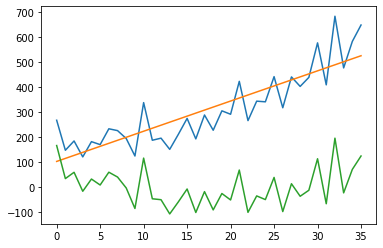

In [25]:
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)

### Spline regression and detrend

Polynomial regression   

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial degree 2
poly = PolynomialFeatures(2)

X_train = poly.fit_transform(X)

pm = LinearRegression()
pm.fit(X_train, y)

LinearRegression()

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = pm.predict(X_train)
rmse_train = mean_squared_error(y, 
                                pred_train, 
                                squared=False)

In [28]:
# Save model results
model_results_lm = pd.DataFrame(
    {
    "model": "Linear Model (lm)",  
    "rmse_train": [rmse_train], 
    })
model_results_lm

,model,rmse_train
0,Linear Model (lm),60.255241


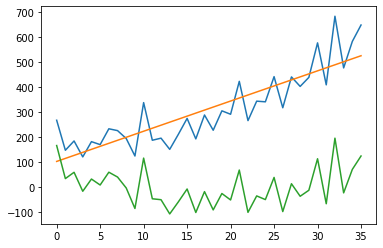

In [29]:
plt.plot(y)
plt.plot(trend)

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)

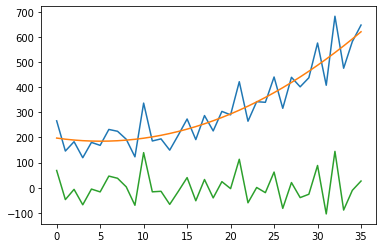

In [30]:
plt.plot(y)
plt.plot(pred_train)

# detrend
detrended_poly = [y[i]-pred_train[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended_poly)

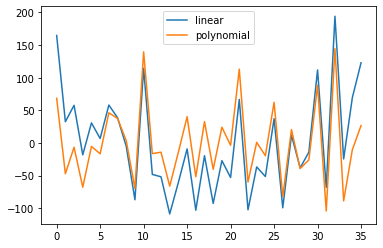

In [35]:
plt.plot(detrended)
plt.plot(detrended_poly)
plt.legend(['linear', 'polynomial'])

## Using library



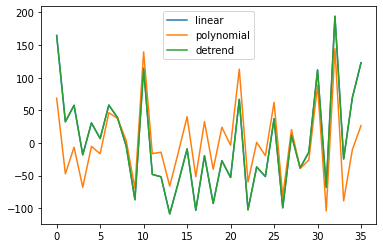

In [36]:
from scipy import signal
y_detrended = signal.detrend(y,)

plt.plot(detrended)
plt.plot(detrended_poly)
plt.plot(y_detrended)
plt.legend(['linear', 'polynomial', 'detrend'])